# Analyse Exploratoire des Données (EDA)
## Licences Sportives en France (2012-2023)


In [1]:
# Bibliothèques standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
pd.set_option("display.max_columns", 50)

df = pd.read_csv("licenses_by_year_region_fed.csv")

print(df.shape)

df.head()

(18784, 18)


,annee,region,nom_fed,total_license,total_f,total_h,h_1_9,h_10_19,h_20_29,h_30_59,h_60_74,h_75,f_1_9,f_10_19,f_20_29,f_30_59,f_60_74,f_75
0,2012,Auvergne-Rhône-Alpes,AEROMODELISME,2494.0,61.0,2433.0,20.0,298.0,142.0,1251.0,622.0,100.0,2.0,8.0,5.0,29.0,14.0,3.0
1,2012,Auvergne-Rhône-Alpes,AEROSTATION,90.0,20.0,70.0,0.0,2.0,3.0,55.0,9.0,1.0,0.0,0.0,3.0,13.0,4.0,0.0
2,2012,Auvergne-Rhône-Alpes,AIKIDO AIKIBUDO ET AFFINITAIRES,2433.0,664.0,1769.0,114.0,477.0,139.0,935.0,93.0,11.0,62.0,173.0,80.0,317.0,31.0,1.0
3,2012,Auvergne-Rhône-Alpes,AIKIDO ET BUDO,2486.0,600.0,1875.0,114.0,502.0,139.0,955.0,125.0,7.0,63.0,177.0,76.0,239.0,32.0,1.0
4,2012,Auvergne-Rhône-Alpes,ATHLETISME,19275.0,8745.0,10510.0,906.0,3628.0,1019.0,4331.0,559.0,64.0,640.0,3646.0,741.0,3334.0,364.0,15.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18784 entries, 0 to 18783
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   annee          18784 non-null  int64  
 1   region         18784 non-null  object 
 2   nom_fed        18784 non-null  object 
 3   total_license  18784 non-null  float64
 4   total_f        18784 non-null  float64
 5   total_h        18784 non-null  float64
 6   h_1_9          18784 non-null  float64
 7   h_10_19        18784 non-null  float64
 8   h_20_29        18784 non-null  float64
 9   h_30_59        18784 non-null  float64
 10  h_60_74        18784 non-null  float64
 11  h_75           18784 non-null  float64
 12  f_1_9          18784 non-null  float64
 13  f_10_19        18784 non-null  float64
 14  f_20_29        18784 non-null  float64
 15  f_30_59        18784 non-null  float64
 16  f_60_74        18784 non-null  float64
 17  f_75           18784 non-null  float64
dtypes: flo

### Analyse des valeurs manquantes

In [5]:
# Calcul des valeurs manquantes
valeurs_manquantes = df.isna().sum().sort_values(ascending=False)
valeurs_manquantes_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

# Tableau de valeurs manquantes
missing_summary = pd.DataFrame({
    'Nombre_Manquant': valeurs_manquantes,
    'Pourcentage': valeurs_manquantes_pct
})

missing_summary = missing_summary[missing_summary['Nombre_Manquant'] > 0]

if len(missing_summary) > 0:
    print("VALEURS MANQUANTES DÉTECTÉES")
    print(missing_summary.head(20))
    
    # Visualisation
    if len(missing_summary) > 0:
        plt.figure(figsize=(12, 6))
        missing_summary.head(20)['Pourcentage'].plot(kind='barh')
        plt.xlabel('Pourcentage de valeurs manquantes (%)')
        plt.title('Distribution des valeurs manquantes par colonne (Top 20)')
        plt.tight_layout()
        plt.show()
else:
    print("✓ Aucune valeur manquante détectée dans le dataset")

✓ Aucune valeur manquante détectée dans le dataset


## Vue d'ensemble du dataset

In [8]:
print(f"Période temporelle    : {df['annee'].min()} → {df['annee'].max()} ({df['annee'].nunique()} années)")
print(f"Régions concernées    : {df['region'].nunique()}")
print(f"\nNombre total d'observations : {len(df):,}")

Période temporelle    : 2012 → 2023 (12 années)
Régions concernées    : 25

Nombre total d'observations : 18,784


## Stats Descriptives

In [10]:
df['total_license'].describe()

count     18784.000000
mean       9055.895336
std       22683.134749
min           0.000000
25%         276.000000
50%        1596.000000
75%        7055.250000
max      306063.000000
Name: total_license, dtype: float64

In [11]:
# Statistiques descriptives des variables numériques
colonnes_num = df.select_dtypes(include=[np.number]).columns
stats_desc = df[colonnes_num].describe().T

## Analyse temporelle

In [15]:
# Calculer le total par année
evolution_annuelle = df.groupby('annee')['total_license'].sum().reset_index()

# Calculer la variation en pourcentage
evolution_annuelle['variation_pourcentage'] = evolution_annuelle['total_license'].pct_change() * 100


print("ÉVOLUTION DES LICENCES PAR ANNÉE")

print(evolution_annuelle)

# Statistiques globales
total_2012 = evolution_annuelle.iloc[0]['total_license']
total_2023 = evolution_annuelle.iloc[-1]['total_license']
print(f"\nLicences 2012 : {total_2012:,.0f}")
print(f"Licences 2023 : {total_2023:,.0f}")
print(f"Variation totale : {((total_2023/total_2012 - 1)*100):+.2f}%")

ÉVOLUTION DES LICENCES PAR ANNÉE
    annee  total_license  variation_pourcentage
0    2012     11162010.0                    NaN
1    2013     11865503.0               6.302566
2    2014     12668709.0               6.769254
3    2015     13481323.0               6.414339
4    2016     15619764.0              15.862249
5    2017     14557672.0              -6.799667
6    2018     14429314.0              -0.881721
7    2019     15880199.0              10.055121
8    2020     15744208.0              -0.856356
9    2021     12870350.0             -18.253430
10   2022     15291830.0              18.814407
11   2023     16535056.0               8.130001

Licences 2012 : 11,162,010
Licences 2023 : 16,535,056
Variation totale : +48.14%


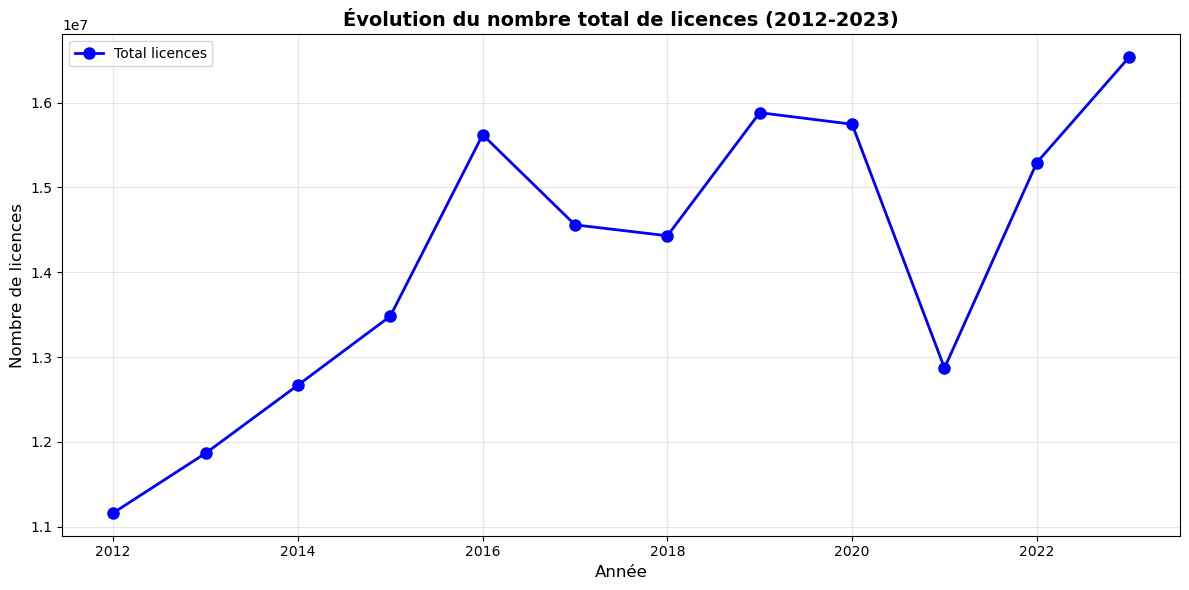

In [16]:
# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(evolution_annuelle['annee'], evolution_annuelle['total_license'], 
         marker='o', linewidth=2, markersize=8, color='blue', label='Total licences')

# Ajouter les labels et le titre
plt.title('Évolution du nombre total de licences (2012-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de licences', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

##  Analyse par Sexe (Hommes / Femmes)

In [17]:
# Calculer les totaux par sexe
evolution_sexe = df.groupby('annee').agg({
    'total_h': 'sum',
    'total_f': 'sum'
}).reset_index()

# Calculer les pourcentages
total_par_annee = evolution_sexe['total_h'] + evolution_sexe['total_f']
evolution_sexe['part_h'] = (evolution_sexe['total_h'] / total_par_annee * 100)
evolution_sexe['part_f'] = (evolution_sexe['total_f'] / total_par_annee * 100)


print("RÉPARTITION HOMMES / FEMMES")

print(evolution_sexe)

print(f"\nRépartition moyenne sur la période :")
print(f"  Hommes : {evolution_sexe['part_h'].mean():.1f}%")
print(f"  Femmes : {evolution_sexe['part_f'].mean():.1f}%")

RÉPARTITION HOMMES / FEMMES
    annee     total_h    total_f     part_h     part_f
0    2012   7033333.0  4120606.0  63.056943  36.943057
1    2013   7389972.0  4145472.0  64.063178  35.936822
2    2014  11735012.0  6554402.0  64.162865  35.837135
3    2015   8460038.0  5006476.0  62.822777  37.177223
4    2016   9680970.0  5938794.0  61.978977  38.021023
5    2017   9084571.0  5473101.0  62.404009  37.595991
6    2018   8964039.0  5465275.0  62.123806  37.876194
7    2019   9778576.0  6101623.0  61.577163  38.422837
8    2020   9599714.0  6144494.0  60.972988  39.027012
9    2021   8020585.0  4849765.0  62.318313  37.681687
10   2022   9464722.0  5827108.0  61.893979  38.106021
11   2023  10144693.0  6390363.0  61.352638  38.647362

Répartition moyenne sur la période :
  Hommes : 62.4%
  Femmes : 37.6%


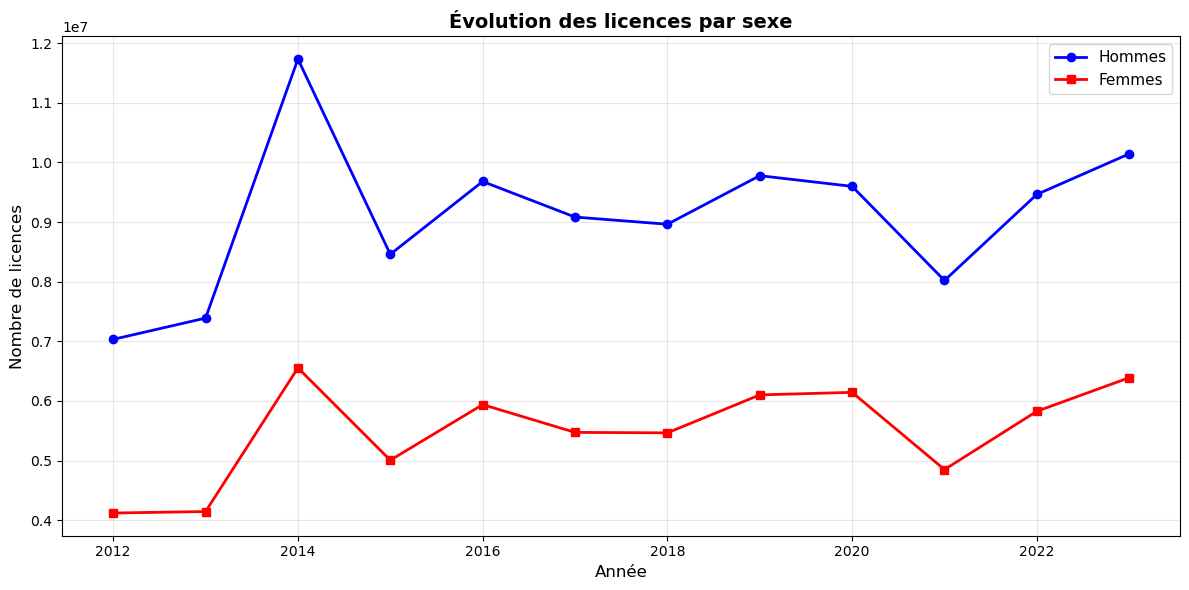

In [18]:
# Créer le graphique
plt.figure(figsize=(12, 6))

# Tracer les deux courbes
plt.plot(evolution_sexe['annee'], evolution_sexe['total_h'], 
         marker='o', linewidth=2, label='Hommes', color='blue')
plt.plot(evolution_sexe['annee'], evolution_sexe['total_f'], 
         marker='s', linewidth=2, label='Femmes', color='red')

# Ajouter les labels
plt.title('Évolution des licences par sexe', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de licences', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##  Analyse par Fédération

In [20]:
# Calculer le total de licencies par fédération
top_federations = df.groupby('nom_fed')['total_license'].sum().sort_values(ascending=False)

print("TOP 20 DES FÉDÉRATIONS SPORTIVES")

print(top_federations.head(20))

# Calculer la part de marché
total_global = top_federations.sum()
print(f"\nTop 3 représente : {(top_federations.head(3).sum() / total_global * 100):.1f}% du total")

TOP 20 DES FÉDÉRATIONS SPORTIVES
nom_fed
FOOTBALL                                               24087575.0
UNION NATIONALE SPORT SCOLAIRE (UNSS)                  12287213.0
TENNIS                                                 11866796.0
EQUITATION                                              7623250.0
UNION SPORTIVE LENSEIGNEMENT PREMIER DEGRE              6218801.0
BASKETBALL                                              5908226.0
HANDBALL                                                5644125.0
EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE            5377437.0
SPORTIVE EDUCATIVE LENSEIGNEMENT CATHOLIQUE (UGSEL)     4950162.0
GOLF                                                    4728779.0
NATATION                                                3757765.0
RUGBY                                                   3532503.0
GYMNASTIQUE                                             3438765.0
ATHLETISME                                              3327512.0
PETANQUE ET JEU PROVENCAL          

###  Graphique : Top 15 Fédérations

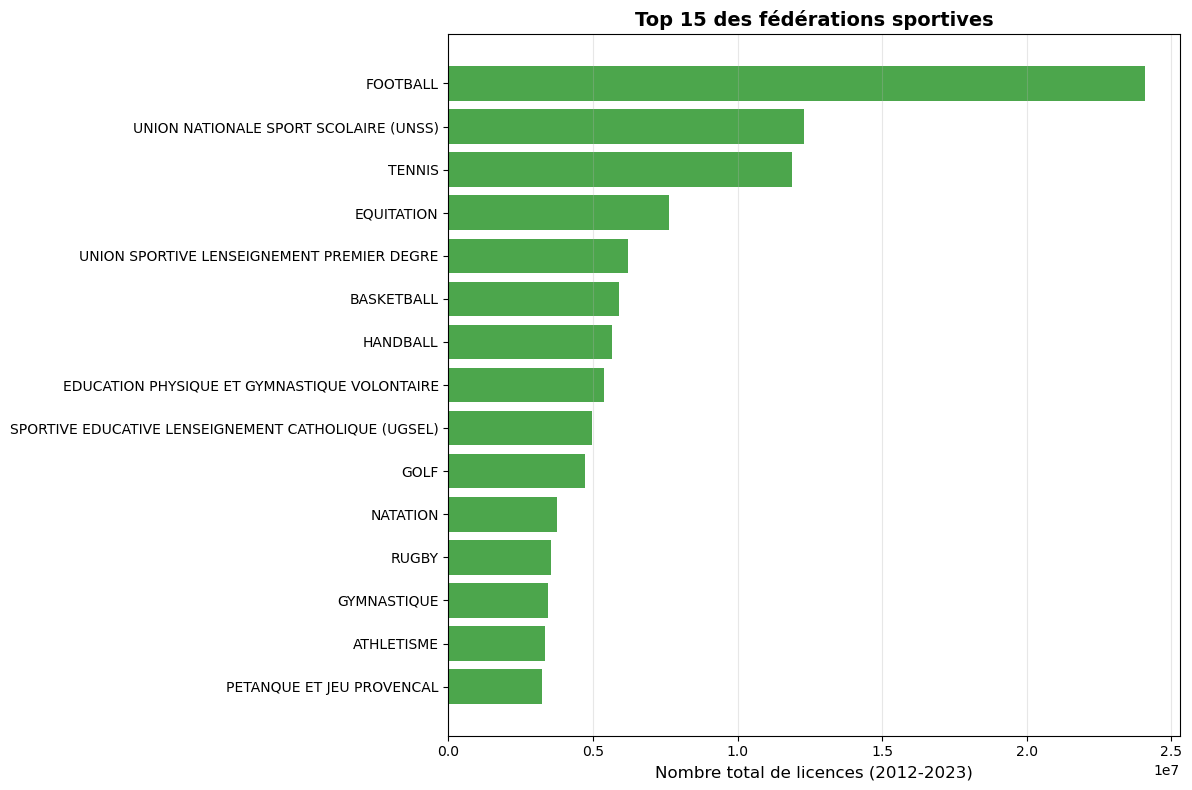

In [21]:
# Prendre le top 15
top_15 = top_federations.head(15)

# Créer le graphique (barres horizontales)
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15)), top_15.values[::-1], color='green', alpha=0.7)
plt.yticks(range(len(top_15)), top_15.index[::-1])
plt.xlabel('Nombre total de licences (2012-2023)', fontsize=12)
plt.title('Top 15 des fédérations sportives', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

##  Analyse par Tranche d'Âge

Comment les licences se répartissent-elles par âge ?

In [22]:
# Définir les colonnes d'âge
colonnes_age_h = ["h_1_9", "h_10_19", "h_20_29", "h_30_59", "h_60_74", "h_75"]
colonnes_age_f = ["f_1_9", "f_10_19", "f_20_29", "f_30_59", "f_60_74", "f_75"]
tranches_labels = ['1-9 ans', '10-19 ans', '20-29 ans', '30-59 ans', '60-74 ans', '75+ ans']

# Calculer les totaux
totaux_h = df[colonnes_age_h].sum().values
totaux_f = df[colonnes_age_f].sum().values

# Créer un DataFrame
age_distribution = pd.DataFrame({
    'Tranche': tranches_labels,
    'Hommes': totaux_h,
    'Femmes': totaux_f
})
age_distribution['Total'] = age_distribution['Hommes'] + age_distribution['Femmes']
age_distribution['%_Total'] = (age_distribution['Total'] / age_distribution['Total'].sum() * 100).round(1)


print("DISTRIBUTION PAR TRANCHE D'ÂGE")

print(age_distribution)

DISTRIBUTION PAR TRANCHE D'ÂGE
     Tranche       Hommes       Femmes        Total  %_Total
0    1-9 ans   27392932.0   22384769.0   49777701.0      4.9
1  10-19 ans  522452721.0  186180637.0  708633358.0     69.4
2  20-29 ans   11701981.0    4940239.0   16642220.0      1.6
3  30-59 ans  160678717.0   66523822.0  227202539.0     22.2
4  60-74 ans    9177826.0    7354291.0   16532117.0      1.6
5    75+ ans    1504481.0    1161765.0    2666246.0      0.3


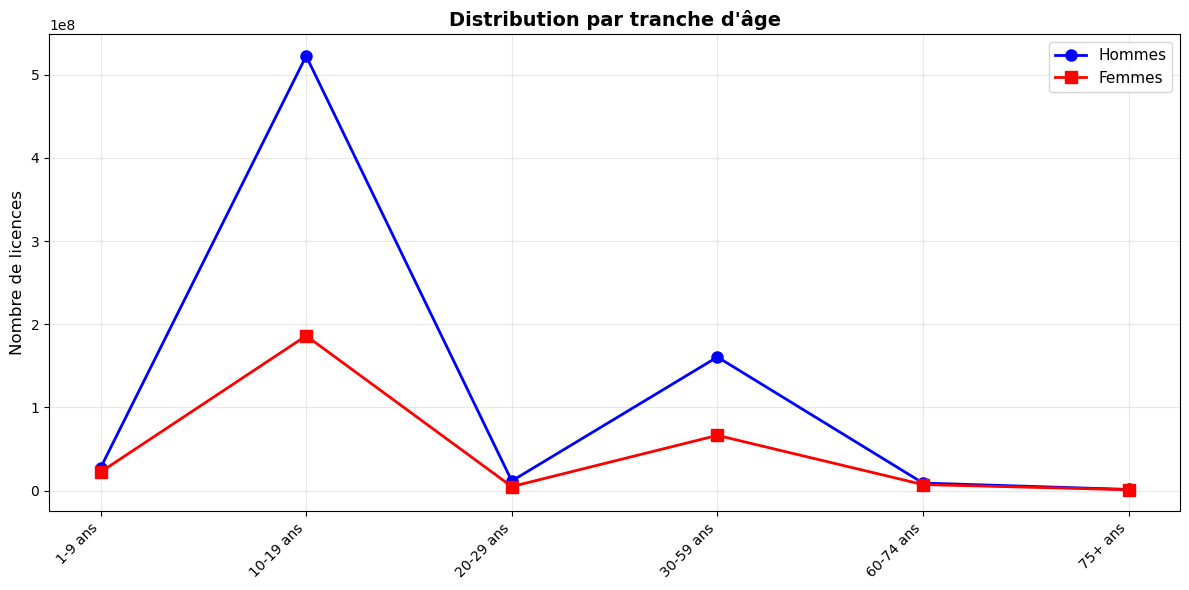

In [23]:
# Créer le graphique
plt.figure(figsize=(12, 6))
x_pos = range(len(tranches_labels))

# Tracer les deux courbes
plt.plot(x_pos, totaux_h, marker='o', linewidth=2, markersize=8, label='Hommes', color='blue')
plt.plot(x_pos, totaux_f, marker='s', linewidth=2, markersize=8, label='Femmes', color='red')

# Configurer le graphique
plt.xticks(x_pos, tranches_labels, rotation=45, ha='right')
plt.ylabel('Nombre de licences', fontsize=12)
plt.title('Distribution par tranche d\'âge', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Analyse Géographique : Régions

Classement de toutes les régions françaises.

In [25]:
# Calculer le total par région
classement_regions = df.groupby('region')['total_license'].sum().sort_values(ascending=False)

# Calculer les parts
total_national = classement_regions.sum()
classement_regions_df = classement_regions.reset_index()
classement_regions_df.columns = ['Région', 'Total Licences']
classement_regions_df['Part (%)'] = (classement_regions_df['Total Licences'] / total_national * 100).round(2)


print("CLASSEMENT DES RÉGIONS")

print(classement_regions_df)

CLASSEMENT DES RÉGIONS
                       Région  Total Licences  Part (%)
0               Île-de-France      26908436.0     15.82
1        Auvergne-Rhône-Alpes      21804832.0     12.82
2          Nouvelle-Aquitaine      17059717.0     10.03
3                   Occitanie      15988619.0      9.40
4                   Grand Est      14204507.0      8.35
5             Hauts-de-France      13945129.0      8.20
6   Provence-Alpes-Côte dAzur      11357305.0      6.68
7            Pays de la Loire      11204852.0      6.59
8                    Bretagne      10133474.0      5.96
9                   Normandie       8118902.0      4.77
10    Bourgogne-Franche-Comté       7132451.0      4.19
11        Centre-Val de Loire       5876733.0      3.45
12                     Centre       1217800.0      0.72
13                 La Réunion       1026724.0      0.60
14                       DROM        998576.0      0.59
15                      Corse        782040.0      0.46
16                 Guadel

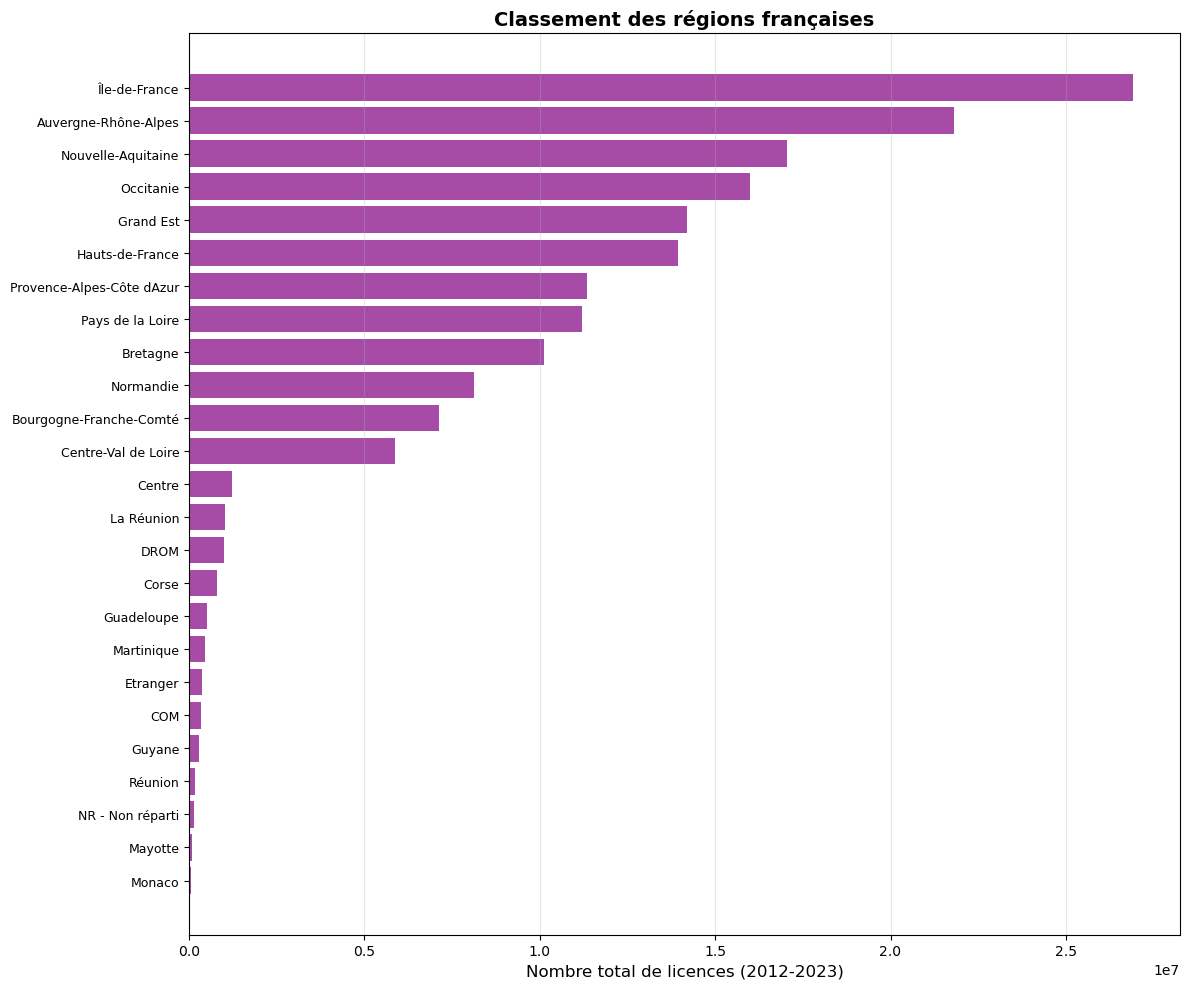

In [26]:
# Créer le graphique
plt.figure(figsize=(12, 10))
plt.barh(range(len(classement_regions)), classement_regions.values[::-1], color='purple', alpha=0.7)
plt.yticks(range(len(classement_regions)), classement_regions.index[::-1], fontsize=9)
plt.xlabel('Nombre total de licences (2012-2023)', fontsize=12)
plt.title('Classement des régions françaises', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

##  Analyse de la Parité

Quelles fédérations sont les plus/moins féminisées ?

In [29]:
# Calculer la part des femmes par fédération
parite_federations = df.groupby('nom_fed').agg({
    'total_license': 'sum',
    'total_f': 'sum',
    'total_h': 'sum'
}).reset_index()

parite_federations['part_femmes'] = (parite_federations['total_f'] / parite_federations['total_license'] * 100).round(2)

# Filtrer les grandes fédérations (> 10 000 licences)
parite_grandes = parite_federations[parite_federations['total_license'] > 10000].sort_values('part_femmes', ascending=False)


print("TOP 10 : FÉDÉRATIONS LES PLUS FÉMINISÉES")

print(parite_grandes.head(10)[['nom_fed', 'part_femmes']])


print("TOP 10 : FÉDÉRATIONS LES MOINS FÉMINISÉES")

print(parite_grandes.tail(10)[['nom_fed', 'part_femmes']])

TOP 10 : FÉDÉRATIONS LES PLUS FÉMINISÉES
                                          nom_fed  part_femmes
153                                TWIRLING BATON        97.78
37   EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE        94.87
135                       SPORTIVE TWIRLING BATON        91.13
33                                          DANSE        89.66
139                              SPORTS POUR TOUS        89.21
138                                  SPORTS GLACE        89.01
126                               SPORT POUR TOUS        87.44
38                                     EQUITATION        86.24
58                                    GYMNASTIQUE        84.24
131                 SPORTIVE ET CULTURELLE FRANCE        74.16
TOP 10 : FÉDÉRATIONS LES MOINS FÉMINISÉES
                          nom_fed  part_femmes
136                SPORTS BILLARD         6.51
91                   MOTOCYCLISME         5.85
164     VOITURES RADIO COMMANDEES         5.82
101              PECHES SPORTIVES   

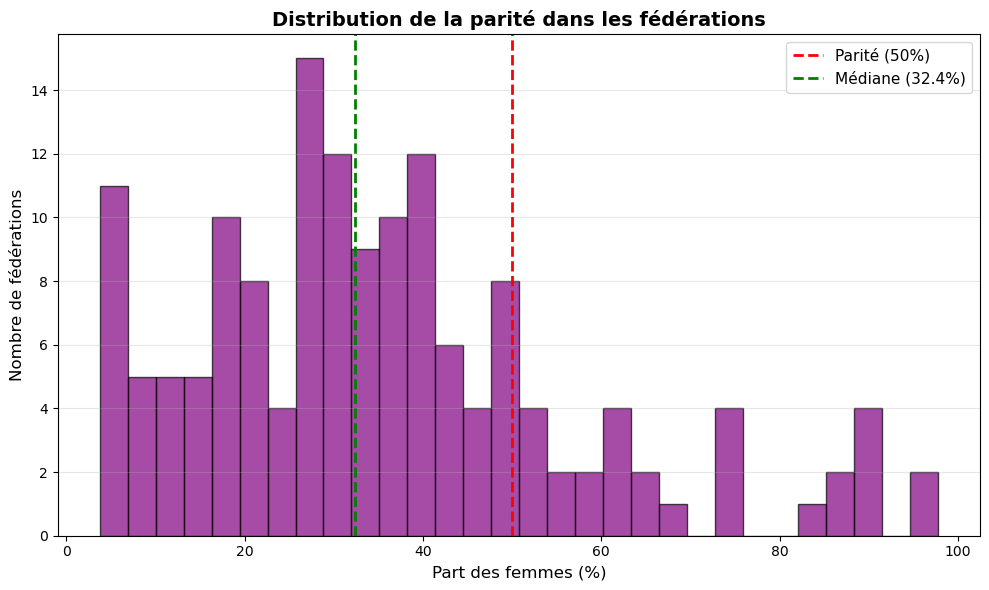

In [30]:
# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(parite_grandes['part_femmes'], bins=30, color='purple', alpha=0.7, edgecolor='black')

# Ajouter des lignes de référence
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Parité (50%)')
plt.axvline(x=parite_grandes['part_femmes'].median(), color='green', 
            linestyle='--', linewidth=2, label=f'Médiane ({parite_grandes["part_femmes"].median():.1f}%)')

plt.xlabel('Part des femmes (%)', fontsize=12)
plt.ylabel('Nombre de fédérations', fontsize=12)
plt.title('Distribution de la parité dans les fédérations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## les fédérations avec la plus forte évolution de la part des femmes

In [ ]:
# Part des femmes par fédération et par année (evolution_parité)
evolution_parite = df.groupby(['nom_fed', 'annee']).agg({
    'total_license': 'sum',
    'total_f': 'sum',
    'total_h': 'sum'
}).reset_index()

# Pourcentage de femmes
evolution_parite['part_femmes'] = (evolution_parite['total_f'] / evolution_parite['total_license'] * 100)

federations_completes = evolution_parite.groupby('nom_fed').size()

In [33]:
print(f"Nombre de fédérations avec données complètes : {len(federations_completes)}")
print(f"\nAperçu des données :")
print(evolution_parite.head())

Nombre de fédérations avec données complètes : 171

Aperçu des données :
         nom_fed  annee  total_license  total_f  total_h  part_femmes
0  AEROMODELISME   2012        25046.0    855.0  24190.0     3.413719
1  AEROMODELISME   2013        24182.0   1079.0  23214.0     4.461997
2  AEROMODELISME   2014        25293.0   1200.0  34548.0     4.744396
3  AEROMODELISME   2015        26378.0    959.0  25416.0     3.635605
4  AEROMODELISME   2016        25919.0    933.0  24986.0     3.599676


In [ ]:
# évolution entre 2012 et 2023
parite_2012 = evolution_parite[evolution_parite['annee'] == 2012][['nom_fed', 'part_femmes']]
parite_2012.columns = ['nom_fed', 'part_femmes_2012']

parite_2023 = evolution_parite[evolution_parite['annee'] == 2023][['nom_fed', 'part_femmes']]
parite_2023.columns = ['nom_fed', 'part_femmes_2023']

# Fusionner les deux DataFrames
evolution_absolue = parite_2012.merge(parite_2023, on='nom_fed')

# Calculons la variation absolue et relative
evolution_absolue['variation_absolue'] = evolution_absolue['part_femmes_2023'] - evolution_absolue['part_femmes_2012']
evolution_absolue['variation_relative'] = ((evolution_absolue['part_femmes_2023'] / evolution_absolue['part_femmes_2012']) - 1) * 100

# On ajoute le nombre total de licences
total_licences = df.groupby('nom_fed')['total_license'].sum().reset_index()
total_licences.columns = ['nom_fed', 'total_licences_periode']
evolution_absolue = evolution_absolue.merge(total_licences, on='nom_fed')

# Trier par variation
evolution_absolue = evolution_absolue.sort_values('variation_absolue', ascending=False)

print("TOP 20 : Fédérations avec la plus forte feminisation (2012-2023)")

print(evolution_absolue.head(20).to_string(index=False))



TOP 20 : Fédérations avec la plus forte feminisation (2012-2023)
                        nom_fed  part_femmes_2012  part_femmes_2023  variation_absolue  variation_relative  total_licences_periode
             FOOTBALL AMERICAIN         13.012006         29.389637          16.377631          125.865538                224614.0
             SPORT TRAVAILLISTE         27.924302         44.011805          16.087503           57.611119                217017.0
                     TIR A LARC         23.662077         34.441149          10.779072           45.554209                825439.0
                 AIKIDO ET BUDO         23.124948         33.589033          10.464085           45.250199                263059.0
     PULKA ET TRAINEAU A CHIENS         34.375000         42.914980           8.539980           24.843577                  6154.0
                           BOXE         18.979714         27.279712           8.299998           43.730891                570294.0
                  

# ANALYSE : Quelles fédérations se sont le plus féminisées au fil du temps ? (rolling)